/Users/earpwl/opt/anaconda3/envs/mag/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '


Fraction of jerk detected: 55%


<Figure size 432x288 with 0 Axes>

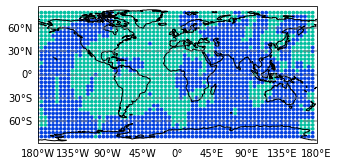

In [49]:
import numpy as np
import pickle
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

jerk_number = 8 
# jerk times as defined in catalogue
jerk_times = [4600,5750,2920, 1915, 6490,7300,7620,7840,8880,9673,10590,12620,13411,13546]
# sample every year
time_yearly = np.arange(jerk_times[jerk_number]-200,jerk_times[jerk_number]+200+1)
t0 = jerk_times[jerk_number]
f_size = 16  # fontsize for figure

filename = "Jerk"+str(jerk_number+1)+"_5x5_20M.results"
with open(filename, "rb") as fp:   # Unpickling
     results = pickle.load(fp)

# make plot of number of jerks over t0 +/- 30 years

height_threshold = 0.2
distance_threshold = 3

x_theta, x_phi,x_count = [],[],[]
y_theta, y_phi,y_count = [],[],[]
z_theta, z_phi,z_count = [],[],[]

for j in range(len(results)):
    theta = results[j][0]
    phi = results[j][1]
    component = results[j][2]
    CP = results[j][3]
    
    if component == 1:
        y_theta.append(theta); y_phi.append(phi)
        peaks,_ = find_peaks( CP, height = height_threshold, distance = distance_threshold)
        y_count.append(len( [time_yearly[i] for i in peaks if (time_yearly[i] < t0+25 and time_yearly[i] > t0-25)]))
    
for i in range(len(y_count)):
    if y_count[i] > 0:
        y_count[i] = 1
        
cmap = plt.get_cmap('winter_r')
plt.figure()
axes = [0,0,0]
f, axes[0] = plt.subplots(nrows=1, ncols=1, figsize=(5,10),subplot_kw={'projection': ccrs.PlateCarree() }) 

marker_size = 7. 


i=0   
cax = axes[i].scatter(y_phi,90.-np.array(y_theta), s = marker_size, c=y_count,cmap=cmap, vmin=0-0.5, vmax=1+0.5)
#axes[i].set_title(r'$dB_Y/dt, \qquad \Sigma_{{total}} = {0:d},\; \Sigma_{{nz}} = {1:d}$'.format(sum(y_count),np.sum(np.array(y_count)>0)),fontsize=f_size)
gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
              linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
    
axes[i].coastlines()
    #gl = axes[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=[1,0,0,1],
    #                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -135., -90, -45., 0, 45., 90, 135., 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#cb_ax = f.add_axes([0.15, -0.0, 0.7, 0.4])
#cb_ax.scatter([0,1,2,3],[0,1,2,3],[0,1,2,4])
#cbar = f.colorbar(cax, ax=cb_ax, orientation = 'horizontal')
#cb_ax.set_axis_off()

#cbar.set_ticks(range(0,max_count+1))
outfname = 'Jerk_2_color_'+str(jerk_number+1)+'_' + str(int(10*height_threshold)) + '_' + str(distance_threshold)+'_5x5_20M'
f.savefig(outfname + '.pdf',bbox_inches = 'tight')
f.savefig(outfname + '.png',bbox_inches = 'tight')

print('Fraction of jerk detected: {0:.0f}%'.format(np.sum(y_count)/len(y_count)*100 ))


In [48]:
np.savetxt('jerk_finder_output.txt',np.vstack((y_theta, y_phi, y_count)).T, fmt='%d')


In [20]:
print('Fraction of jerk detected: {0:f}'.format(np.sum(y_count)/len(y_count)*100 ))


Fraction of jerk detected: 56.523569
